## **FER (Facial Emotion Recognition) using Custom CNN Model**

# **Visualize the Dataset statistics for the original dataset**

In [ ]:
# FER Custom CNN
%matplotlib inline

import os                               # Manipulate operating system interfaces.

import numpy as np                      # Data wrangling.
import pandas as pd                     # Data handling.

import matplotlib.pyplot as plt         # Data visualization.
import plotly.express as px             # Data visualization
import plotly.graph_objects as go       # Data visualization
import seaborn as sns                   # Data visualization.
sns.set()

import pickle                           # Python object serialization.

from fer_dataset import FERDataset      # FER Dataset preprocessing and visualization

import warnings                   # Ignore all warnings.
warnings.filterwarnings("ignore")

# create an instance of FERDataset
fer_dataset = FERDataset()

root_folder = "./FER/dataset/"
ds_file = "ckextended.csv"

# print the FER dataset statistics and visualize
fer_dataset.print_ds_statistics(root_folder,ds_file)


df.shape = (920, 3) 

Unique emotions =  [0, 1, 2, 3, 4, 5, 6, 7] 

# of Unique emotions = 8 

emotion
6    593
5     83
3     69
1     59
0     45
4     28
2     25
7     18
Name: count, dtype: int64 

Unique Usage = ['PrivateTest', 'PublicTest', 'Training'] 

# of Unique Usage = 3 

Usage
Training       734
PrivateTest     95
PublicTest      91
Name: count, dtype: int64 

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

Emotion Counts:
emotion
6    593
5     83
3     69
1     59
0     45
4     28
2     25
7     18
Name: count, dtype: int64

Data Imbalance Statistics (Percentage):
emotion
6    64.46
5     9.02
3     7.50
1     6.41
0     4.89
4     3.04
2     2.72
7     1.96
Name: count, dtype: float64


**The Original CKExtend Dataset shows data imbalance.  There are far more Neutral emotion images 593/902 (64%) and rest of the emotion classes have fewer images from ~3 % to 9% only**

# Handle Data imbalance - Undersample the Neutral emotion class
and Oversample other emotion classes

In [ ]:
# set the name of the final preprocessed dataset file
ds_processed_file = "ckextended_processed.csv"

# invoke preprocess method of fer_dataset to under sample max class (Neutral Emotion) and over sample other classes (Sad, Angry, Disgust etc)
ck_df, ds_processed_file_path = fer_dataset.preprocess(root_folder,ds_file,ds_processed_file,212,200)

# print the resample dataset statistics and visualize
fer_dataset.print_ds_statistics(root_folder,ds_processed_file)

ck_df

6
474
Oversampled dataset saved to ./FER/dataset/ckextended_processed.csv
df.shape = (1763, 3) 

Unique emotions =  [0, 1, 2, 3, 4, 5, 6] 

# of Unique emotions = 7 

emotion
6    500
5    217
3    214
1    212
0    209
4    206
2    205
Name: count, dtype: int64 

Unique Usage = ['PrivateTest', 'PublicTest', 'Training'] 

# of Unique Usage = 3 

Usage
Training       1215
PrivateTest     280
PublicTest      268
Name: count, dtype: int64 

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

Emotion Counts:
emotion
6    500
5    217
3    214
1    212
0    209
4    206
2    205
Name: count, dtype: int64

Data Imbalance Statistics (Percentage):
emotion
6    28.36
5    12.31
3    12.14
1    12.02
0    11.85
4    11.68
2    11.63
Name: count, dtype: float64


,emotion,pixels,Usage
0,4,254 255 63 56 55 56 70 81 83 70 66 67 49 60 69...,Training
1,5,180 138 35 39 39 39 47 49 41 49 59 48 31 34 37...,Training
2,6,82 84 81 66 35 3 4 4 9 23 30 24 22 51 87 90 13...,Training
3,5,201 198 194 172 59 61 74 52 73 107 67 67 102 1...,PublicTest
4,2,50 53 37 2 2 4 3 1 7 15 10 8 47 57 72 19 28 37...,Training
...,...,...,...
1758,0,122 118 76 43 61 66 75 22 206 254 255 255 255 ...,PrivateTest
1759,4,159 17 11 7 6 11 22 35 49 68 77 80 80 89 82 10...,PrivateTest
1760,3,51 41 31 28 18 19 18 18 18 26 29 25 54 88 116 ...,Training
1761,2,64 59 56 39 33 36 43 36 32 48 44 48 65 77 68 8...,PublicTest


**After resampling the dataset is mostly balanced**
Neutral: 28.36% vs 11% to 12% rest of the classes


# Visualize some sample images

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral



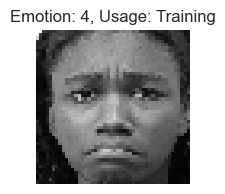

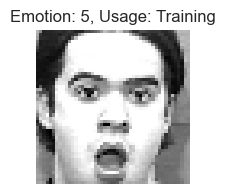

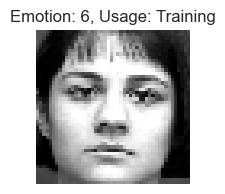

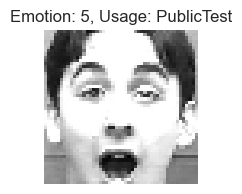

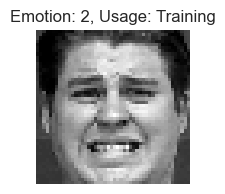

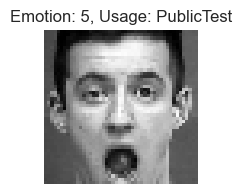

In [ ]:
# visualize some sample images in the resampled dataset
fer_dataset.visualize_image_data(ck_df,5)

# Baseline the Custom CNN Model first with original CKExtended Dataset

In [ ]:
# Baseline the model with original CKExtended dataset
# Load the dataset
ds_file_path = root_folder + "ckextended.csv"
df_original = pd.read_csv(ds_file_path)

# Remove the Contempt emotion.
df_original = df_original.loc[df_original["emotion"] != 7]

# import the CustomFERCNN class to train and validate Custom FER CNN model
from fer_custom_cnn import FERCustomCNN

# create an instance of Custom FER CNN model
fer_cust_cnn_orig = FERCustomCNN()

# create and compile the model
model_orig = fer_cust_cnn_orig.create_and_compile_model()

# train the Custom CNN model
X_test_orig, y_test_orig, history_orig, label_encoder_orig = fer_cust_cnn.train_model(df_original,model_orig,0.2,20,25,0.2)

# Evaluate the Custom CNN model
y_pred_orig = fer_cust_cnn.evaluate_model(model_orig,X_test_orig)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.5842 - loss: 1.5155 - val_accuracy: 0.6966 - val_loss: 1.2290
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6450 - loss: 1.3400 - val_accuracy: 0.6966 - val_loss: 1.2795
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6523 - loss: 1.3130 - val_accuracy: 0.6966 - val_loss: 1.1982
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6279 - loss: 1.3126 - val_accuracy: 0.6966 - val_loss: 1.2009
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6553 - loss: 1.2636 - val_accuracy: 0.6966 - val_loss: 1.1809
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6207 - loss: 1.3196 - val_accuracy: 0.6966 - val_loss: 1.2079
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6644 - loss: 1.2143 - val_accuracy: 0.6966 - val_loss: 1.2380
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6593 - loss: 1.3100 - val_accuracy: 0.6966 - v

Custom CNN Model Trained with 20 Epoch

**Notice F1-score of 0.85**

# Plot the Confusion Matrix for Custom CNN Model for the Original CKExtended Dataset

F1-Score: 0.85


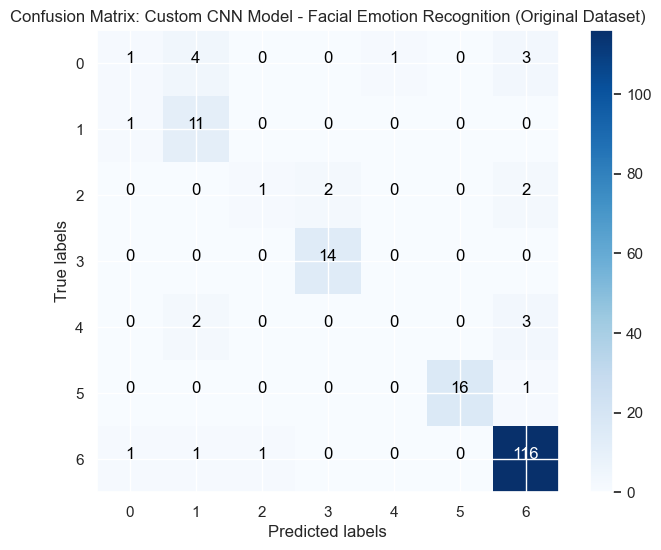

In [ ]:
# import the AIMLUtils for visualizing output of AI ML model
from ai_ml_utils import AIMLUtils

# create an instance of AIML Utils
aiml_utils_orig = AIMLUtils()

# compute the F1-Score
f1_orig = aiml_utils_orig.calc_f1_score(y_test_orig, y_pred_orig)

# plot the confusion matrix
aiml_utils_orig.plot_confusion_matrix(y_test_orig,y_pred_orig,"Confusion Matrix: Custom CNN Model - Facial Emotion Recognition (Original Dataset)")

# Print the Model Summary for the original CKExtend Dataset

              precision    recall  f1-score   support

       Angry       0.33      0.11      0.17         9
     Disgust       0.61      0.92      0.73        12
        Fear       0.50      0.20      0.29         5
       Happy       0.88      1.00      0.93        14
         Sad       0.00      0.00      0.00         5
    Surprise       1.00      0.94      0.97        17
     Neutral       0.93      0.97      0.95       119

    accuracy                           0.88       181
   macro avg       0.61      0.59      0.58       181
weighted avg       0.84      0.88      0.85       181



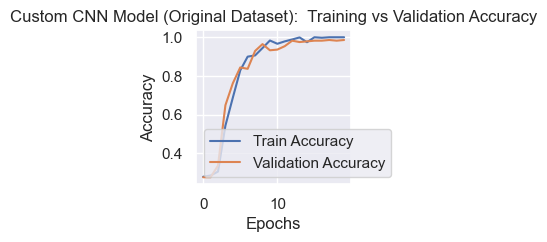

<Figure size 900x600 with 0 Axes>

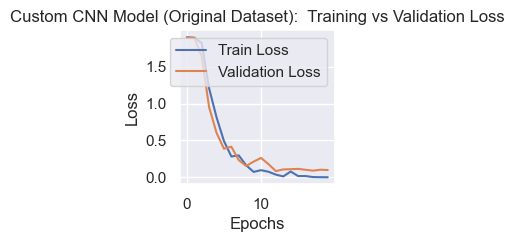

<Figure size 900x600 with 0 Axes>

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,366,295 (5.21 MB)

 Trainable params: 455,431 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 910,864 (3.47 MB)

In [ ]:
# using AIML Utils developed print the classification report
aiml_utils_orig.print_classification_report(y_test_orig,y_pred_orig)

# plot the training history
aiml_utils_orig.plot_training_history(history, "Custom CNN Model (Original Dataset): ")

# print the model summary
aiml_utils_orig.print_model_summary(model_orig)

# Visualize some random samples (Actual vs Predicted) for the original CKExtended Dataset

Original Dataset: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral


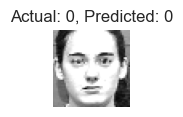

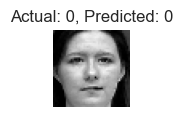

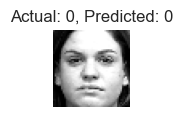

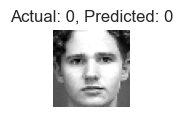

In [ ]:
# Visualize the images, actual emotions, and predicted emotions
# Visualize the 1st 5 out of the random test samples
random_indices_orig = np.random.randint(10, len(X_test_orig), 10)
y_pred_classes_orig = np.argmax(y_pred_orig, axis=1)
predicted_emotions_orig = label_encoder_orig.inverse_transform(y_pred_classes_orig)
print("Original Dataset: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral")
counter = 0
for idx in random_indices_orig:
    image = X_test_orig[idx].reshape(48, 48)
    actual_emotion_orig = label_encoder_orig.inverse_transform([y_test_orig[idx]])[0]
    predicted_emotion_orig = predicted_emotions_orig[idx]
    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap='gray')
    plt.title(f"Actual: {actual_emotion}, Predicted: {predicted_emotion}")
    plt.axis('off')  # Hide axes
    plt.show()
    counter = counter + 1
    if counter >= 4:
        break

**Notice that the random sample have mostly Neutral images as there are too many Neutral images**

# Train and Evaluate the Custom CNN Model with CKExtended Processed Dataset (includes resampling)

In [ ]:
# import the CustomFERCNN class to train and validate Custom FER CNN model
from fer_custom_cnn import FERCustomCNN

# create an instance of Custom FER CNN model
fer_cust_cnn = FERCustomCNN()

# create and compile the model
model = fer_cust_cnn.create_and_compile_model()

# train the Custom CNN model
X_test, y_test, history, label_encoder = fer_cust_cnn.train_model(ck_df,model,0.2,20,25,0.2)

# Evaluate the Custom CNN model
y_pred = fer_cust_cnn.evaluate_model(model,X_test)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.2518 - loss: 1.9084 - val_accuracy: 0.2766 - val_loss: 1.8911
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2683 - loss: 1.9083 - val_accuracy: 0.2766 - val_loss: 1.8930
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.2973 - loss: 1.8563 - val_accuracy: 0.3369 - val_loss: 1.6397
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4836 - loss: 1.3817 - val_accuracy: 0.6489 - val_loss: 0.9506
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6519 - loss: 0.8966 - val_accuracy: 0.7624 - val_loss: 0.6038
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7960 - loss: 0.5858 - val_accuracy: 0.8440 - val_loss: 0.3876
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8910 - loss: 0.2866 - val_accuracy: 0.8369 - val_loss: 0.4149
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8606 - loss: 0.4031 - val_accuracy: 0.9291 - v

# Visualize the Confusion Matrix for Custom CNN Model (Processed Dataset)

F1-Score: 0.99


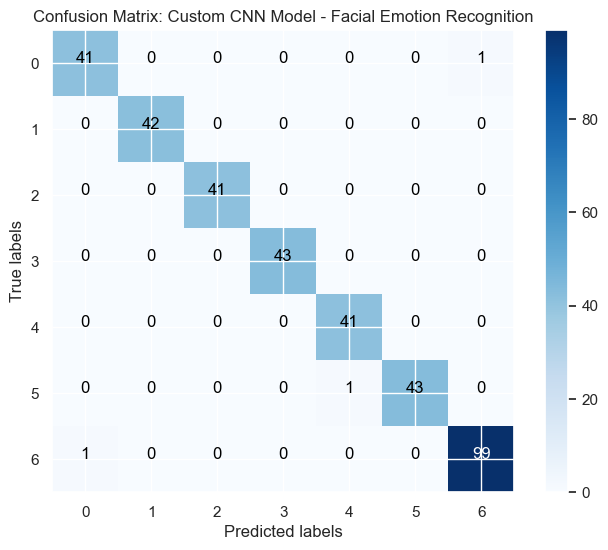

In [ ]:
# import the AIMLUtils for visualizing output of AI ML model
from ai_ml_utils import AIMLUtils

# create an instance of AIML Utils
aiml_utils = AIMLUtils()

# compute the F1-Score
f1 = aiml_utils.calc_f1_score(y_test, y_pred)

# plot the confusion matrix
aiml_utils.plot_confusion_matrix(y_test,y_pred,"Confusion Matrix: Custom CNN Model - Facial Emotion Recognition")



**Notice F1-Score of 0.99 (Processed Dataset) vs F1-Score of 0.85 for CKExtended Original Dataset**

              precision    recall  f1-score   support

       Angry       0.98      0.98      0.98        42
     Disgust       1.00      1.00      1.00        42
        Fear       1.00      1.00      1.00        41
       Happy       1.00      1.00      1.00        43
         Sad       0.98      1.00      0.99        41
    Surprise       1.00      0.98      0.99        44
     Neutral       0.99      0.99      0.99       100

    accuracy                           0.99       353
   macro avg       0.99      0.99      0.99       353
weighted avg       0.99      0.99      0.99       353



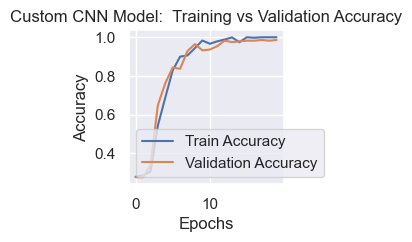

<Figure size 900x600 with 0 Axes>

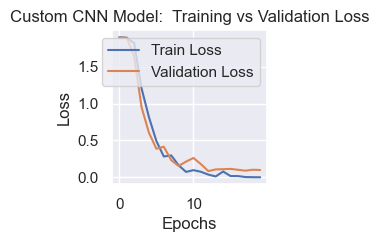

<Figure size 900x600 with 0 Axes>

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,366,295 (5.21 MB)

 Trainable params: 455,431 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 910,864 (3.47 MB)

In [ ]:
# using AIML Utils developed print the classification report
aiml_utils.print_classification_report(y_test,y_pred)

# plot the training history
aiml_utils.plot_training_history(history, "Custom CNN Model: ")

# print the model summary
aiml_utils.print_model_summary(model)

# Save the Custom CNN Model

In [ ]:
# Save the entire model to a keras file
CCNModelFilePath = './FER/model/CNNModel.keras'
model.save(CCNModelFilePath)

# Visualize some Random Samples (Actual vs Predicted) Emotions

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral



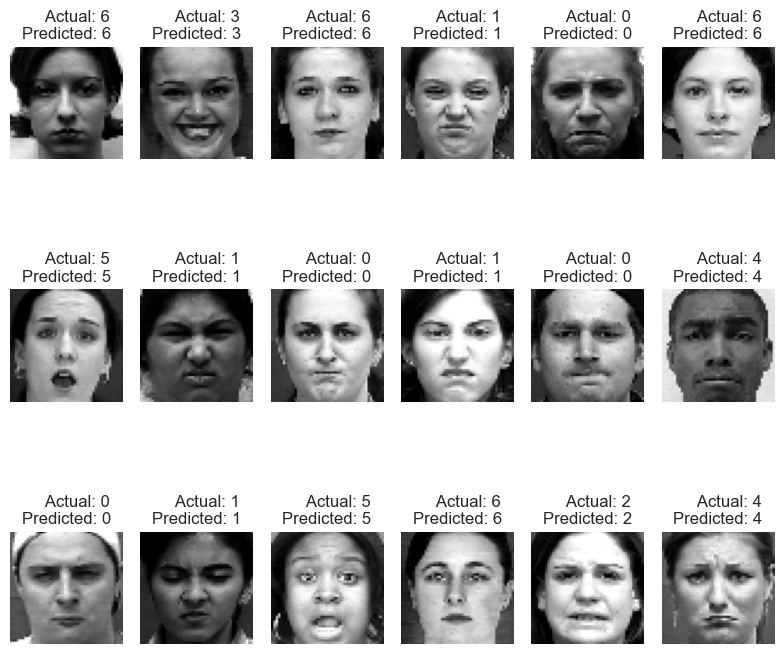

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

y_pred_classes = np.argmax(y_pred, axis=1)
predicted_emotions = label_encoder.inverse_transform(y_pred_classes)

# Choose random indices for visualization (you can adjust this as needed)
n_samples_to_visualize = 18
random_indices = np.random.randint(0, len(X_test), n_samples_to_visualize)

print("0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral\n")
counter = 0

# Create a 3x5 grid of subplots
fig, axs = plt.subplots(3, 6, figsize=(8, 8))

for idx in random_indices:
    image = X_test[idx].reshape(48, 48)
    actual_emotion = label_encoder.inverse_transform([y_test[idx]])[0]
    predicted_emotion = predicted_emotions[idx]

    row, col = divmod(counter, 6)  # Calculate row and column indices
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(f"      Actual: {actual_emotion} \nPredicted: {predicted_emotion}")
    axs[row, col].axis('off')  # Hide axes
    counter = counter + 1

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


# Visualize first few random sample emotion (Actual vs Prediction)

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral


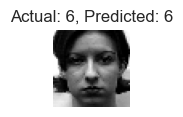

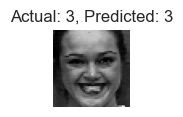

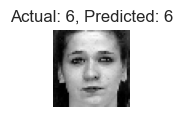

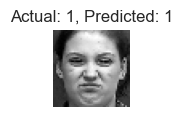

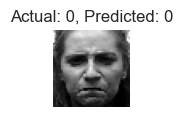

In [ ]:
# Visualize the images, actual emotions, and predicted emotions
# Visualize the 1st 5 out of the random test samples
print("0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral")
counter = 0
for idx in random_indices:
    image = X_test[idx].reshape(48, 48)
    actual_emotion = label_encoder.inverse_transform([y_test[idx]])[0]
    predicted_emotion = predicted_emotions[idx]
    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap='gray')
    plt.title(f"Actual: {actual_emotion}, Predicted: {predicted_emotion}")
    plt.axis('off')  # Hide axes
    plt.show()
    counter = counter + 1
    if counter >= 5:
        break
